Author: Nicolas Legrand nicolas.legrand@cfin.au.dk

In [1]:
# %%capture
# ! pip install git+https://github.com/LegrandNico/metadPy.git
# ! pip install pymc

In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from metadPy.bayesian import hmetad

sns.set_context("talk")

# Single subject

In [3]:
# Create responses data
nR_S1 = np.array([52, 32, 35, 37, 26, 12, 4, 2])
nR_S2 = np.array([2, 5, 15, 22, 33, 38, 40, 45])

## Using metadPy.

In [4]:
model, traces = hmetad(nR_S1=nR_S1, nR_S2=nR_S2, backend="pymc")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c1, d1, meta_d, cS1_hn, cS2_hn]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


## Using HMeta-d

The results were generated by the `example_metad_indiv.R` file.

In [6]:
hmetad_df = pd.read_csv("./hmetad/metad_indiv.txt", sep="\t")

## Comparison

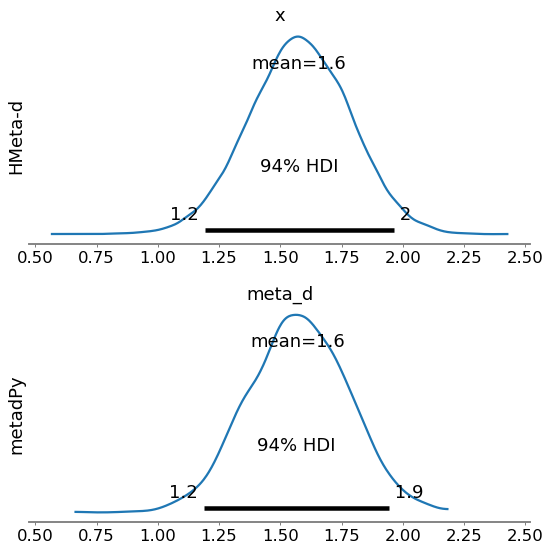

In [10]:
_, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
az.plot_posterior(hmetad_df.meta_d.to_numpy(), ax=axs[0])
az.plot_posterior(traces, var_names=["meta_d"], ax=axs[1])

axs[0].set_ylabel("HMeta-d")
axs[1].set_ylabel("metadPy")

plt.tight_layout()